# Importing Libraries##

In [31]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as math

# Importing Data File##

In [32]:
df = pd.read_csv("C:\BIA\Project B\mumbai-monthly-rains.csv")

# Data Reading and Cleaning

In [33]:
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [35]:
df.isnull()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
# Count how many times 0 appears in the DataFrame
count_zeros = (df == 0).sum().sum()

# Display the result
print(f'The number of cells with value 0: {count_zeros}')

The number of cells with value 0: 564


In [37]:
# Count the number of cells with value 0 in each row
df['Zero_Count'] = df.apply(lambda row: (row == 0).sum(), axis=1)

# Display the updated DataFrame with the new 'Zero_Count' column
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Zero_Count
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,4
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,4
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,5
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,6
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,4


In [38]:
# Count the number of zero values in each column
zero_counts = (df == 0).sum()

# Display the result
print(zero_counts)

Year           0
Jan           91
Feb           90
Mar           94
April         88
May           54
June           0
July           0
Aug            0
Sept           0
Oct            8
Nov           50
Dec           89
Total          0
Zero_Count     1
dtype: int64


In [39]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['Jan', 'Feb', 'Mar', 'April', 'Dec'])

# Display the updated DataFrame
print(df.head())

   Year         May        June        July         Aug        Sept  \
0  1901   17.139791  640.714036  888.369692  545.045796   64.271513   
1  1902    0.355001  247.998782  408.433730  566.595863  688.913455   
2  1903  220.568740  370.849048  902.447896  602.420828  264.589816   
3  1904    0.000000  723.081969  390.886799  191.581927   85.704754   
4  1905    0.000000  123.870892  581.827975  167.382149  172.297723   

          Oct        Nov        Total  Zero_Count  
0    9.871696   0.000000  2182.478796           4  
1   28.654092   0.488864  1960.966334           4  
2  157.892877   0.000000  2519.613240           5  
3   38.679948   0.000000  1441.317168           6  
4    7.365924  24.903575  1080.024250           4  


In [40]:
df.head()

,Year,May,June,July,Aug,Sept,Oct,Nov,Total,Zero_Count
0,1901,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,2182.478796,4
1,1902,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,1960.966334,4
2,1903,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,2519.613240,5
3,1904,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,1441.317168,6
4,1905,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,1080.024250,4


Forecasting using ARIMA Model

C:\Users\amarh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amarh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amarh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amarh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\amarh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

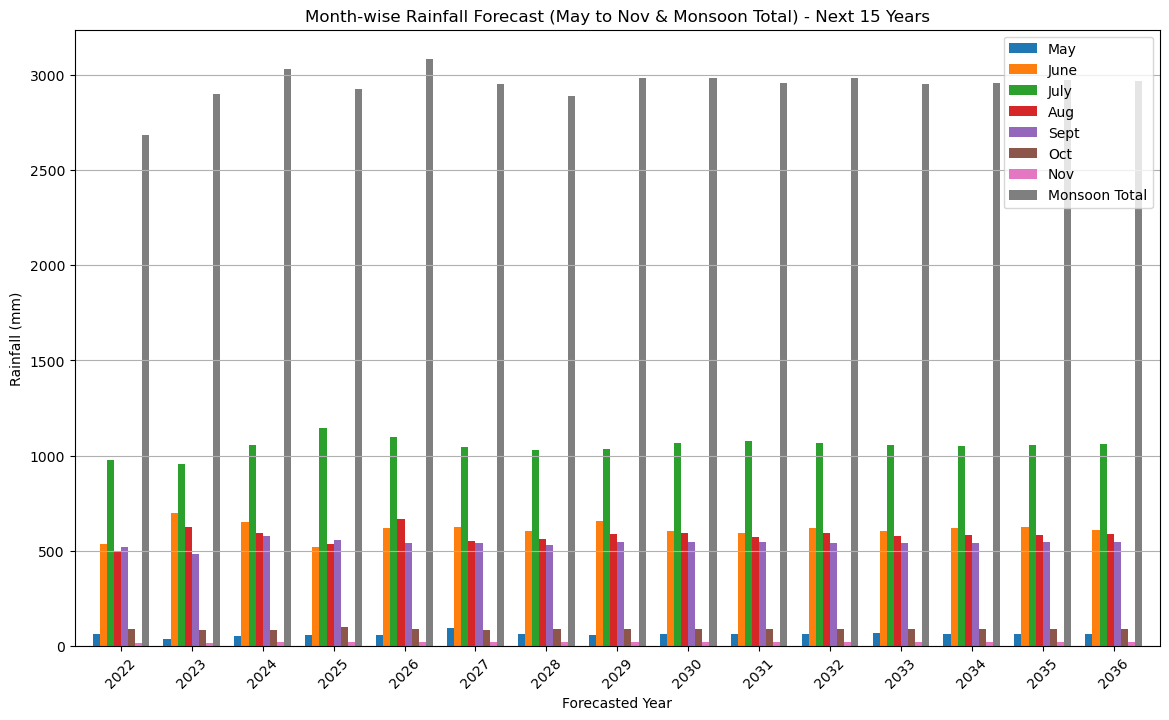

            May        June         July         Aug        Sept        Oct  \
2022  59.066769  536.294700   978.355827  492.968955  517.321039  85.533123   
2023  35.385637  699.694945   953.685407  626.227139  482.203009  84.307334   
2024  51.463385  652.217865  1054.063953  594.681010  577.880012  83.535157   
2025  55.090140  518.605851  1144.349964  535.933487  557.100330  96.324063   
2026  57.540279  617.147789  1096.192665  665.500645  542.394959  88.724111   
2027  91.508367  623.938794  1044.242824  551.841816  541.666835  82.655854   
2028  63.282052  601.801188  1028.691358  563.308040  529.918787  86.874704   
2029  55.877063  657.338215  1033.844671  586.983399  545.025690  86.882183   
2030  61.605349  604.630666  1068.198030  594.344498  547.745261  87.701016   
2031  63.255805  594.346744  1078.886769  571.956726  544.032897  87.782352   
2032  63.718995  617.361524  1065.154188  592.632054  542.184773  86.674638   
2033  68.780186  605.580213  1053.746446  579.382422

In [41]:
import pandas as pd #Re-Imported to avoid processing errors##
import matplotlib.pyplot as plt #Re-Imported to avoid processing errors##
from statsmodels.tsa.arima.model import ARIMA #Re-Imported to avoid processing errors##

# Assuming df is already loaded with your rainfall data##
# Use the monthly columns for forecasting: May, June, July, Aug, Sept, Oct, Nov

monthly_columns = ['May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']

# Create an empty DataFrame to store the forecasted values for the next 15 years

forecast_df = pd.DataFrame(index=range(1, 16), columns=monthly_columns)

# Forecast each month's rainfall for the next 15 years using ARIMA

for month in monthly_columns:
    # Prepare the time series for the month
    
    monthly_series = df.set_index('Year')[month]
    
    # Fit an ARIMA model (adjust parameters if needed)
    model = ARIMA(monthly_series, order=(5, 1, 0))  # Adjust the (p, d, q) as necessary
    model_fit = model.fit()
    
    # Forecast the next 15 years
    forecast = model_fit.forecast(steps=15)
    
    # Store the forecasted values in the DataFrame
    forecast_df[month] = forecast.values

# Calculate the Monsoon Total for each year (sum of May to Nov)
forecast_df['Monsoon Total'] = forecast_df.sum(axis=1)

# Set the index to represent future years (next 15 years)
start_year = int(df['Year'].max()) + 1
forecast_df.index = pd.date_range(start=str(start_year), periods=15, freq='Y').year

# Plot a bar chart for each month and Monsoon Total
forecast_df.plot(kind='bar', figsize=(14, 8), width=0.8)

# Customize the chart
plt.title('Month-wise Rainfall Forecast (May to Nov & Monsoon Total) - Next 15 Years')
plt.xlabel('Forecasted Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right')
plt.grid(axis='y')

# Show the bar chart
plt.show()

# Display the forecasted values
print(forecast_df)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        121 non-null    int64  
 1   May         121 non-null    float64
 2   June        121 non-null    float64
 3   July        121 non-null    float64
 4   Aug         121 non-null    float64
 5   Sept        121 non-null    float64
 6   Oct         121 non-null    float64
 7   Nov         121 non-null    float64
 8   Total       121 non-null    float64
 9   Zero_Count  121 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 9.6 KB


In [43]:
# First, ensure the 'Year' column is in both DataFrames
# Assuming the original df has 'Year' column and forecast_df has index as years

# Convert the forecast index (years) into a column 'Year'
forecast_df['Year'] = forecast_df.index

# Re-arrange forecast_df columns to match df (ensure the column order is consistent)
# Example: If df has other columns like 'Total', you can add it
columns_order = ['Year', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Monsoon Total']
forecast_df = forecast_df[columns_order]

# Concatenate the original df with forecast_df
# Ensure df has the same columns for May to Nov and 'Year'
merged_df = pd.concat([df, forecast_df], ignore_index=True)
df = merged_df
# Display the merged DataFrame
print(df)


     Year         May        June         July         Aug        Sept  \
0    1901   17.139791  640.714036   888.369692  545.045796   64.271513   
1    1902    0.355001  247.998782   408.433730  566.595863  688.913455   
2    1903  220.568740  370.849048   902.447896  602.420828  264.589816   
3    1904    0.000000  723.081969   390.886799  191.581927   85.704754   
4    1905    0.000000  123.870892   581.827975  167.382149  172.297723   
..    ...         ...         ...          ...         ...         ...   
131  2032   63.718995  617.361524  1065.154188  592.632054  542.184773   
132  2033   68.780186  605.580213  1053.746446  579.382422  540.322345   
133  2034   63.734157  619.578161  1048.928480  580.058771  542.230470   
134  2035   62.032458  624.924525  1054.419606  582.498760  543.819254   
135  2036   63.571455  608.036969  1062.605350  585.702728  543.354359   

            Oct        Nov        Total  Zero_Count  Monsoon Total  
0      9.871696   0.000000  2182.478796   

In [44]:
df.tail()

,Year,May,June,July,Aug,Sept,Oct,Nov,Total,Zero_Count,Monsoon Total
131,2032,63.718995,617.361524,1065.154188,592.632054,542.184773,86.674638,18.633779,NaN,NaN,2986.359951
132,2033,68.780186,605.580213,1053.746446,579.382422,540.322345,86.711074,18.772113,NaN,NaN,2953.294798
133,2034,63.734157,619.578161,1048.928480,580.058771,542.230470,87.076268,18.645825,NaN,NaN,2960.252131
134,2035,62.032458,624.924525,1054.419606,582.498760,543.819254,87.125534,18.721009,NaN,NaN,2973.541147
135,2036,63.571455,608.036969,1062.605350,585.702728,543.354359,87.156166,18.712930,NaN,NaN,2969.139958


In [45]:
# Drop the 'Total' and 'Zero Count' columns from the DataFrame
df = df.drop(columns=['Total'])

# Display the updated DataFrame
print(df)

     Year         May        June         July         Aug        Sept  \
0    1901   17.139791  640.714036   888.369692  545.045796   64.271513   
1    1902    0.355001  247.998782   408.433730  566.595863  688.913455   
2    1903  220.568740  370.849048   902.447896  602.420828  264.589816   
3    1904    0.000000  723.081969   390.886799  191.581927   85.704754   
4    1905    0.000000  123.870892   581.827975  167.382149  172.297723   
..    ...         ...         ...          ...         ...         ...   
131  2032   63.718995  617.361524  1065.154188  592.632054  542.184773   
132  2033   68.780186  605.580213  1053.746446  579.382422  540.322345   
133  2034   63.734157  619.578161  1048.928480  580.058771  542.230470   
134  2035   62.032458  624.924525  1054.419606  582.498760  543.819254   
135  2036   63.571455  608.036969  1062.605350  585.702728  543.354359   

            Oct        Nov  Zero_Count  Monsoon Total  
0      9.871696   0.000000         4.0            NaN  

In [46]:
df = df.drop(columns=['Zero_Count'])

In [47]:
df.head()

,Year,May,June,July,Aug,Sept,Oct,Nov,Monsoon Total
0,1901,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,NaN
1,1902,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,NaN
2,1903,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,NaN
3,1904,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,NaN
4,1905,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,NaN


In [48]:
# Recalculate the 'Monsoon Total' as the sum of May to Nov
df['Monsoon Total'] = df[['May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']].sum(axis=1)

# Display the updated DataFrame
print(df)

     Year         May        June         July         Aug        Sept  \
0    1901   17.139791  640.714036   888.369692  545.045796   64.271513   
1    1902    0.355001  247.998782   408.433730  566.595863  688.913455   
2    1903  220.568740  370.849048   902.447896  602.420828  264.589816   
3    1904    0.000000  723.081969   390.886799  191.581927   85.704754   
4    1905    0.000000  123.870892   581.827975  167.382149  172.297723   
..    ...         ...         ...          ...         ...         ...   
131  2032   63.718995  617.361524  1065.154188  592.632054  542.184773   
132  2033   68.780186  605.580213  1053.746446  579.382422  540.322345   
133  2034   63.734157  619.578161  1048.928480  580.058771  542.230470   
134  2035   62.032458  624.924525  1054.419606  582.498760  543.819254   
135  2036   63.571455  608.036969  1062.605350  585.702728  543.354359   

            Oct        Nov  Monsoon Total  
0      9.871696   0.000000    2165.412525  
1     28.654092   0.488

In [49]:
df.head()

,Year,May,June,July,Aug,Sept,Oct,Nov,Monsoon Total
0,1901,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,2165.412525
1,1902,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,1941.439787
2,1903,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,2518.769205
3,1904,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,1429.935398
4,1905,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,1077.648238


In [50]:
df.tail()

,Year,May,June,July,Aug,Sept,Oct,Nov,Monsoon Total
131,2032,63.718995,617.361524,1065.154188,592.632054,542.184773,86.674638,18.633779,2986.359951
132,2033,68.780186,605.580213,1053.746446,579.382422,540.322345,86.711074,18.772113,2953.294798
133,2034,63.734157,619.578161,1048.928480,580.058771,542.230470,87.076268,18.645825,2960.252131
134,2035,62.032458,624.924525,1054.419606,582.498760,543.819254,87.125534,18.721009,2973.541147
135,2036,63.571455,608.036969,1062.605350,585.702728,543.354359,87.156166,18.712930,2969.139958


In [51]:
# Export the DataFrame to a CSV file
df.to_csv('C:\BIA\Project B\ mumbai_rainfall_alldata.csv', index=False)

In [55]:
# Get the last 12 rows from the DataFrame df
tail_12_rows = df.tail(12)

# Display the last 11 rows
print(tail_12_rows)

     Year        May        June         July         Aug        Sept  \
124  2025  55.090140  518.605851  1144.349964  535.933487  557.100330   
125  2026  57.540279  617.147789  1096.192665  665.500645  542.394959   
126  2027  91.508367  623.938794  1044.242824  551.841816  541.666835   
127  2028  63.282052  601.801188  1028.691358  563.308040  529.918787   
128  2029  55.877063  657.338215  1033.844671  586.983399  545.025690   
129  2030  61.605349  604.630666  1068.198030  594.344498  547.745261   
130  2031  63.255805  594.346744  1078.886769  571.956726  544.032897   
131  2032  63.718995  617.361524  1065.154188  592.632054  542.184773   
132  2033  68.780186  605.580213  1053.746446  579.382422  540.322345   
133  2034  63.734157  619.578161  1048.928480  580.058771  542.230470   
134  2035  62.032458  624.924525  1054.419606  582.498760  543.819254   
135  2036  63.571455  608.036969  1062.605350  585.702728  543.354359   

           Oct        Nov  Monsoon Total  
124  96

In [56]:
# Export the DataFrame to a CSV file
tail_12_rows.to_csv('C:\BIA\Project B\ mumbai_rainfall_forecast.csv', index=False)

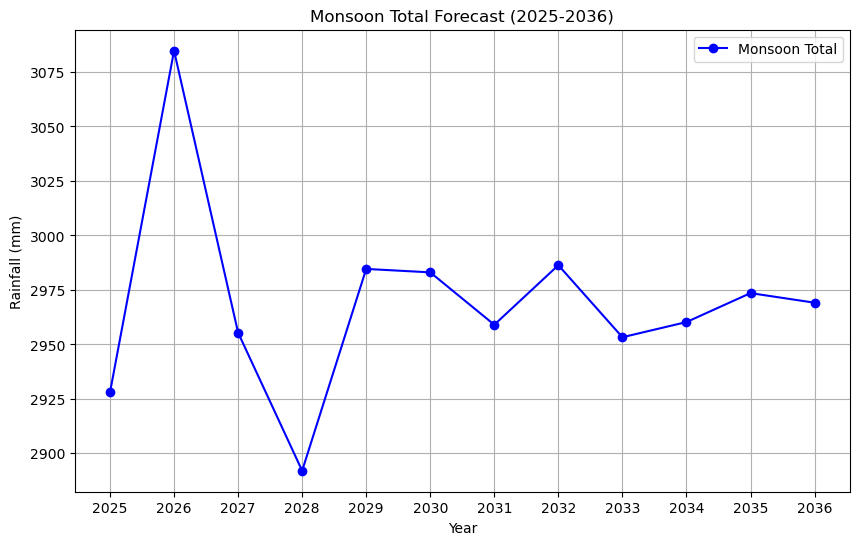

In [57]:
# Plot the data for the years 2025 to 2036 (Monsoon Total)##
plt.figure(figsize=(10, 6))
plt.plot(tail_12_rows['Year'], tail_12_rows['Monsoon Total'], marker='o', color='blue', label='Monsoon Total')

# Customize the plot
plt.title('Monsoon Total Forecast (2025-2036)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(tail_12_rows['Year'])  # Ensures all years are shown on the x-axis
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


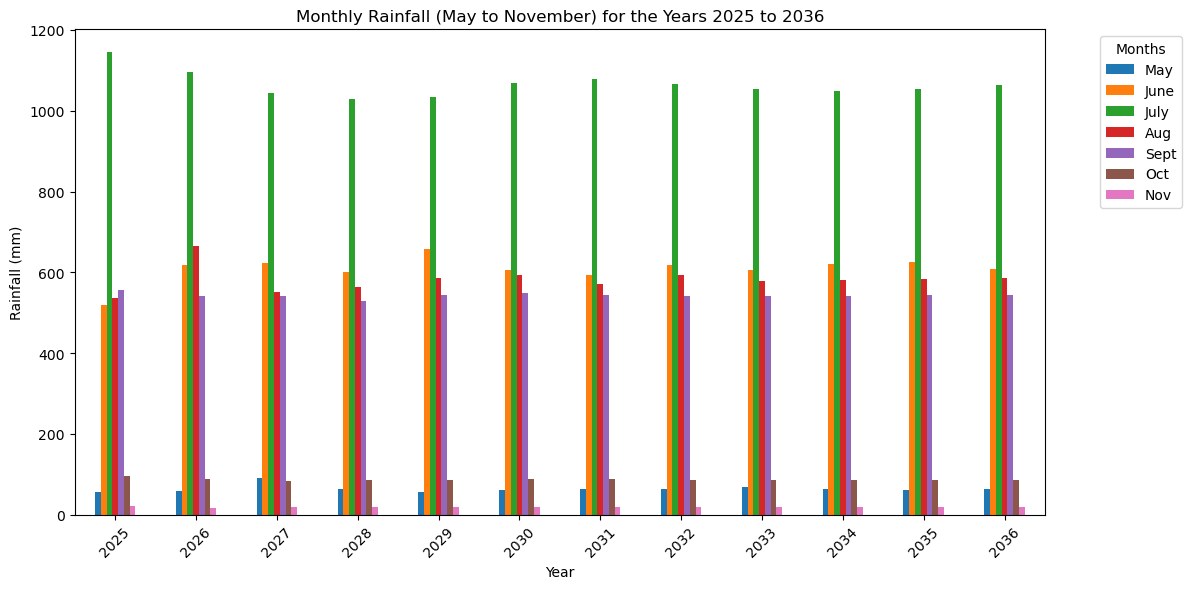

In [58]:
# Filter data for the years 2025 to 2036##
df_last_12_years = df[(df['Year'] >= 2025) & (df['Year'] <= 2036)]

# Plot a bar chart for each month (May to November) over the last 12 years
months = ['May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']

# Plotting
df_last_12_years.set_index('Year')[months].plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title('Monthly Rainfall (May to November) for the Years 2025 to 2036')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#The End##